In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

2024-02-02 18:06:58.741706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 18:06:58.741740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 18:06:58.742572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 18:06:58.748451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 18:06:59.494763: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv('act_train.csv')
people = pd.read_csv('people.csv')

In [3]:
print('Shape of DF:', df.shape)
print('Shape of people DF:', people.shape)

Shape of DF: (2197291, 15)
Shape of people DF: (189118, 41)


In [4]:
df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


Calculate the percentage of Null values in each column

In [5]:
df.isna().sum()/df.shape[0]

people_id            0.000000
activity_id          0.000000
date                 0.000000
activity_category    0.000000
char_1               0.928268
char_2               0.928268
char_3               0.928268
char_4               0.928268
char_5               0.928268
char_6               0.928268
char_7               0.928268
char_8               0.928268
char_9               0.928268
char_10              0.071732
outcome              0.000000
dtype: float64

In [6]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [7]:
people.isna().sum().sum()

0

In [8]:
columns_to_remove = ["char_" + str(x) for x in np.arange(1,10)]
print('Columns to remove:', columns_to_remove)

Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']


In [9]:
df = df[list(set(df.columns) - set(columns_to_remove))]
df

,date,activity_category,char_10,people_id,outcome,activity_id
0,2023-08-26,type 4,type 76,ppl_100,0,act2_1734928
1,2022-09-27,type 2,type 1,ppl_100,0,act2_2434093
2,2022-09-27,type 2,type 1,ppl_100,0,act2_3404049
3,2023-08-04,type 2,type 1,ppl_100,0,act2_3651215
4,2023-08-26,type 2,type 1,ppl_100,0,act2_4109017
...,...,...,...,...,...,...
2197286,2023-06-16,type 4,type 418,ppl_99994,1,act2_4668076
2197287,2023-03-30,type 4,type 1832,ppl_99994,1,act2_4743548
2197288,2023-01-19,type 2,type 1,ppl_99994,1,act2_536973
2197289,2023-05-02,type 4,type 199,ppl_99994,1,act2_688656


In [10]:
df = df.rename(columns={'date': 'activity_date', 'char_10': 'activity_type'})
df

,activity_date,activity_category,activity_type,people_id,outcome,activity_id
0,2023-08-26,type 4,type 76,ppl_100,0,act2_1734928
1,2022-09-27,type 2,type 1,ppl_100,0,act2_2434093
2,2022-09-27,type 2,type 1,ppl_100,0,act2_3404049
3,2023-08-04,type 2,type 1,ppl_100,0,act2_3651215
4,2023-08-26,type 2,type 1,ppl_100,0,act2_4109017
...,...,...,...,...,...,...
2197286,2023-06-16,type 4,type 418,ppl_99994,1,act2_4668076
2197287,2023-03-30,type 4,type 1832,ppl_99994,1,act2_4743548
2197288,2023-01-19,type 2,type 1,ppl_99994,1,act2_536973
2197289,2023-05-02,type 4,type 199,ppl_99994,1,act2_688656


In [11]:
df['activity_type'] = df['activity_type'].fillna(df['activity_type'].mode()[0])
df

,activity_date,activity_category,activity_type,people_id,outcome,activity_id
0,2023-08-26,type 4,type 76,ppl_100,0,act2_1734928
1,2022-09-27,type 2,type 1,ppl_100,0,act2_2434093
2,2022-09-27,type 2,type 1,ppl_100,0,act2_3404049
3,2023-08-04,type 2,type 1,ppl_100,0,act2_3651215
4,2023-08-26,type 2,type 1,ppl_100,0,act2_4109017
...,...,...,...,...,...,...
2197286,2023-06-16,type 4,type 418,ppl_99994,1,act2_4668076
2197287,2023-03-30,type 4,type 1832,ppl_99994,1,act2_4743548
2197288,2023-01-19,type 2,type 1,ppl_99994,1,act2_536973
2197289,2023-05-02,type 4,type 199,ppl_99994,1,act2_688656


In [12]:
df_new = df.merge(people, on=['people_id'], how='inner')
df_new

,activity_date,activity_category,activity_type,people_id,outcome,activity_id,char_1,group_1,char_2,date,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,2023-08-26,type 4,type 76,ppl_100,0,act2_1734928,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,2022-09-27,type 2,type 1,ppl_100,0,act2_2434093,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,2022-09-27,type 2,type 1,ppl_100,0,act2_3404049,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
3,2023-08-04,type 2,type 1,ppl_100,0,act2_3651215,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
4,2023-08-26,type 2,type 1,ppl_100,0,act2_4109017,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,2023-06-16,type 4,type 418,ppl_99994,1,act2_4668076,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197287,2023-03-30,type 4,type 1832,ppl_99994,1,act2_4743548,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197288,2023-01-19,type 2,type 1,ppl_99994,1,act2_536973,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95
2197289,2023-05-02,type 4,type 199,ppl_99994,1,act2_688656,type 2,group 17764,type 3,2023-01-06,...,True,True,True,True,False,True,True,True,True,95


In [13]:
print('Unique values for outcome:', df_new['outcome'].unique())
print('\nPercentage of ditribution for outcome:')
print(df_new['outcome'].value_counts()/df_new.shape[0])

Unique values for outcome: [0 1]

Percentage of ditribution for outcome:
0    0.556046
1    0.443954
Name: outcome, dtype: float64


Data Engineering

In [14]:
print('Distinc DataTypes:', list(df_new.dtypes.unique()))

Distinc DataTypes: [dtype('O'), dtype('int64'), dtype('bool')]


Extracting boolean columns

In [15]:
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ['DataType']
boolean_columns = temp.index[temp['DataType'] == 'bool'].values
print('Boolean columns - \n', boolean_columns)

for column in boolean_columns:
    df_new[column] = np.where(df_new[column] == True, 1, 0)

print('\nDistinct DataTypes after processing:', df.dtypes.unique())

Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']

Distinct DataTypes after processing: [dtype('O') dtype('int64')]


Extracting the categorical columns

In [16]:
categorical_columns =  temp.index[temp['DataType'] == 'O'].values

for column in categorical_columns:
    print(column + 'column has : ', str(len(df_new[column].unique())) + ' distinct values')

activity_datecolumn has :  411 distinct values
activity_categorycolumn has :  7 distinct values
activity_typecolumn has :  6515 distinct values
people_idcolumn has :  151295 distinct values
activity_idcolumn has :  2197291 distinct values
char_1column has :  2 distinct values
group_1column has :  29899 distinct values
char_2column has :  3 distinct values
datecolumn has :  1196 distinct values
char_3column has :  43 distinct values
char_4column has :  25 distinct values
char_5column has :  9 distinct values
char_6column has :  7 distinct values
char_7column has :  25 distinct values
char_8column has :  8 distinct values
char_9column has :  9 distinct values


In [17]:
df_new['date'] = pd.to_datetime(df_new['date'])

df_new['Year'] = df_new['date'].dt.year
df_new['Month'] = df_new['date'].dt.month
df_new['Quarter'] = df_new['date'].dt.quarter
df_new['Week'] = df_new['date'].dt.isocalendar().week
df_new['WeekDay'] = df_new['date'].dt.weekday
df_new['Day'] = df_new['date'].dt.day

df_new['activity_date'] = pd.to_datetime(df_new['activity_date'])

df_new['Activity_Year'] = df_new['activity_date'].dt.year
df_new['Activity_Month'] = df_new['activity_date'].dt.month
df_new['Activity_Quarter'] = df_new['activity_date'].dt.quarter
df_new['Activity_Week'] = df_new['activity_date'].dt.isocalendar().week
df_new['Activity_WeekDay'] = df_new['activity_date'].dt.weekday
df_new['Activity_Day'] = df_new['activity_date'].dt.day

del(df_new['date'])
del(df_new['activity_date'])

df_new

,activity_category,activity_type,people_id,outcome,activity_id,char_1,group_1,char_2,char_3,char_4,...,Quarter,Week,WeekDay,Day,Activity_Year,Activity_Month,Activity_Quarter,Activity_Week,Activity_WeekDay,Activity_Day
0,type 4,type 76,ppl_100,0,act2_1734928,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2023,8,3,34,5,26
1,type 2,type 1,ppl_100,0,act2_2434093,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2022,9,3,39,1,27
2,type 2,type 1,ppl_100,0,act2_3404049,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2022,9,3,39,1,27
3,type 2,type 1,ppl_100,0,act2_3651215,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2023,8,3,31,4,4
4,type 2,type 1,ppl_100,0,act2_4109017,type 2,group 17304,type 2,type 5,type 5,...,2,26,1,29,2023,8,3,34,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197286,type 4,type 418,ppl_99994,1,act2_4668076,type 2,group 17764,type 3,type 2,type 7,...,1,1,4,6,2023,6,2,24,4,16
2197287,type 4,type 1832,ppl_99994,1,act2_4743548,type 2,group 17764,type 3,type 2,type 7,...,1,1,4,6,2023,3,1,13,3,30
2197288,type 2,type 1,ppl_99994,1,act2_536973,type 2,group 17764,type 3,type 2,type 7,...,1,1,4,6,2023,1,1,3,3,19
2197289,type 4,type 199,ppl_99994,1,act2_688656,type 2,group 17764,type 3,type 2,type 7,...,1,1,4,6,2023,5,2,18,1,2


In [18]:
df_new[['people_id', 'activity_type', 'activity_id', 'group_1']].head()

,people_id,activity_type,activity_id,group_1
0,ppl_100,type 76,act2_1734928,group 17304
1,ppl_100,type 1,act2_2434093,group 17304
2,ppl_100,type 1,act2_3404049,group 17304
3,ppl_100,type 1,act2_3651215,group 17304
4,ppl_100,type 1,act2_4109017,group 17304


In [19]:
df_new.people_id = df_new.people_id.apply(lambda x:x.split('_')[1])
df_new.people_id = pd.to_numeric(df_new.people_id)

df_new.activity_id = df_new.activity_id.apply(lambda x:x.split('_')[1])
df_new.activity_id = pd.to_numeric(df_new.activity_id)

df_new.group_1 = df_new.group_1.apply(lambda x:x.split(' ')[1])
df_new.group_1 = pd.to_numeric(df_new.group_1)

df_new.activity_type = df_new.activity_type.apply(lambda x:x.split(' ')[1])
df_new.activity_type = pd.to_numeric(df_new.activity_type)

df_new[['people_id', 'activity_type', 'activity_id', 'group_1']].head()

,people_id,activity_type,activity_id,group_1
0,100.0,76,1734928.0,17304
1,100.0,1,2434093.0,17304
2,100.0,1,3404049.0,17304
3,100.0,1,3651215.0,17304
4,100.0,1,4109017.0,17304


In [20]:
def create_ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(df_new[col]).reshape(-1, 1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col + '_' + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns=column_names))

The next cell is optional because it use a lot of memory

In [21]:
target = ['outcome']
numeric_columns = list(set(temp.index[(temp.DataType == 'float64') |
                                      (temp.DataType == 'int64')].values) - set(target))
temp = df_new[numeric_columns]

for column in categorical_columns:
    temp_df = create_ohe(df_new, column)
    temp = pd.concat([temp, temp_df], axis=1)

print('\nShape of final df after onehot encoding: ', temp.shape)

KeyError: 'activity_date'

Split the data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(temp, df_new[target], test_size=0.2, random_state=2024)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2024)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of x_val: ', x_val.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)
print('Shape of y_val: ', y_val.shape)

Shape of x_train:  (1582048, 1)
Shape of x_test:  (439459, 1)
Shape of x_val:  (175784, 1)
Shape of y_train:  (1582048, 1)
Shape of y_test:  (439459, 1)
Shape of y_val:  (175784, 1)


In [23]:
df_new['outcome'].value_counts()/df_new.shape[0]

0    0.556046
1    0.443954
Name: outcome, dtype: float64

Designing the ANN for classification

In [25]:
model = Sequential()
history = History()

model.add(Dense(512, input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=64, callbacks=[history])

Epoch 1/3


2024-02-02 18:09:48.319050: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-02 18:09:48.792650: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0844886050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-02 18:09:48.792674: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-02-02 18:09:48.797643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-02 18:09:48.813143: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1706918988.896186   20324 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24720/24720 [==============================] - 65s 3ms/step - loss: 0.3865 - accuracy: 0.8291 - val_loss: 0.3792 - val_accuracy: 0.8339
Epoch 2/3
24720/24720 [==============================] - 61s 2ms/step - loss: 0.3772 - accuracy: 0.8337 - val_loss: 0.3765 - val_accuracy: 0.8346
Epoch 3/3
24720/24720 [==============================] - 61s 2ms/step - loss: 0.3764 - accuracy: 0.8340 - val_loss: 0.3759 - val_accuracy: 0.8339


In [26]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [27]:
model = Sequential()
history = History()

model.add(Dense(512, input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64, callbacks=[history])

Epoch 1/15
24720/24720 [==============================] - 62s 2ms/step - loss: 0.3861 - accuracy: 0.8295 - val_loss: 0.3786 - val_accuracy: 0.8329
Epoch 2/15
24720/24720 [==============================] - 60s 2ms/step - loss: 0.3772 - accuracy: 0.8337 - val_loss: 0.3753 - val_accuracy: 0.8346
Epoch 3/15
24720/24720 [==============================] - 60s 2ms/step - loss: 0.3763 - accuracy: 0.8341 - val_loss: 0.3761 - val_accuracy: 0.8339
Epoch 4/15
24720/24720 [==============================] - 60s 2ms/step - loss: 0.3760 - accuracy: 0.8341 - val_loss: 0.3747 - val_accuracy: 0.8346
Epoch 5/15
24720/24720 [==============================] - 60s 2ms/step - loss: 0.3756 - accuracy: 0.8342 - val_loss: 0.3751 - val_accuracy: 0.8346
Epoch 6/15
24720/24720 [==============================] - 61s 2ms/step - loss: 0.3754 - accuracy: 0.8341 - val_loss: 0.3747 - val_accuracy: 0.8339
Epoch 7/15
24720/24720 [==============================] - 61s 2ms/step - loss: 0.3752 - accuracy: 0.8342 - val_loss: 0

In [28]:
result = model.evaluate(x_test_scaled, y_test)

for i in range(len(model.metrics_names)):
    print('Metric ', model.metrics_names[i], ':', str(round(result[i], 2)))

13734/13734 [==============================] - 21s 1ms/step - loss: 4.8277 - accuracy: 0.5549
Metric  loss : 4.83
Metric  accuracy : 0.55


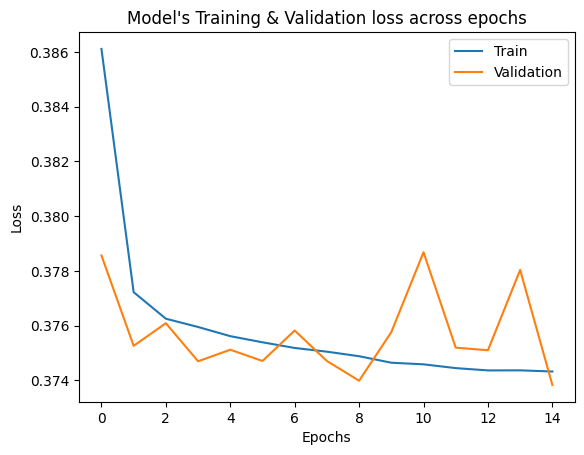

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

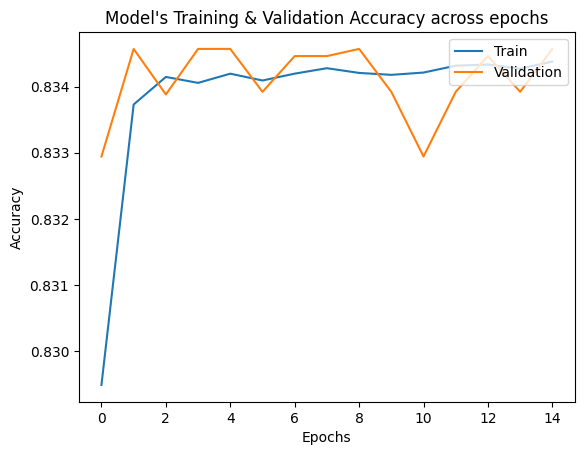

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()